## Pre-processing and Training Data Development

- Goal is to create a cleaned development dataset you can use to complete the modeling step of this project.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import os
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import stem

In [2]:
os.getcwd()

'C:\\Shalin\\Springboard bootcamp\\Springboard repo_github\\Springboard-DS-Track\\Capstone Three_StackOverflow\\notebooks'

In [3]:
df = pd.read_csv("..\data\Stackoverflow_cleansed.csv")

In [4]:
df.shape

(1455901, 8)

In [5]:
df.sample(5)

,Unnamed: 0,Q_Score,A_Score,Id,Title,Q_Body,Tag,A_Body
515606,626747,1,0,14002830,add ajax parameters onstart funct,pa primefaces commandbutton actionlistener pag...,"ajax, jsf-2, primefaces",understand correct want pass value hold javasc...
242428,299602,4,5,6789880,put print linkbutton project page printout infom,pi using rails applicationstudent register nee...,ruby-on-rails-3,use tag make print link lt linkto print yourli...
941385,1120625,0,0,25668380,sqlserver syntax oracl,pive playing around query time cant seem make ...,"sql, sql-server, oracle",youve got several small problems query string ...
157446,194598,0,2,4508390,kill sessions browsertab clos,pive trying solve hrefhttpstackoverflowcomques...,"javascript, session, input, click, onclick",ok tips replace three lines youve added button...
487600,593738,1,1,13129830,read thunderbird unread mail linux termin,pi building statusbar dwm want read unreadmail...,"c, email, ubuntu, thunderbird, dwm",answer dont enough rep comment bellow answer a...


In [6]:
stop_words = stopwords.words('english')
nltk.download('stopwords')
nltk.download('punkt')

stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gosal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gosal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
#df['Q_Body'] = df[~df['Q_Body'].str.contains(r'(?<!\S)(?!http|\S*www\.)\S{12}')]
#df.shape[0]

**Note**: Stemming on Q_Body and A_Body column was not done in the Data Wrangling step, so resuming this step so all the 'text' columns in the dataframe are cleansed as a part of Text pre-processing

In [8]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if len(token) < 20 ]
    return ' '.join(stemmed_tokens)

df['Q_Body'] = df['Q_Body'].apply(stem_sentences)
df['A_Body'] = df['A_Body'].apply(stem_sentences)
df.shape[0]

1455901

In [9]:
df.dtypes

Unnamed: 0     int64
Q_Score        int64
A_Score        int64
Id             int64
Title         object
Q_Body        object
Tag           object
A_Body        object
dtype: object

In [10]:
df.head(4)

,Unnamed: 0,Q_Score,A_Score,Id,Title,Q_Body,Tag,A_Body
0,0,7,1,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",valid captur separ getter setter valid method ...
1,1,7,3,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",perspect maintain code think much valid setter...
2,2,7,3,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",depend gener code fail fast valu set multipl p...
3,3,7,1,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",might wanna check domain driven design eric ev...


In [11]:
#df['Q_Body'] = df['Q_Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

### 1. Standardize the magnitude of numeric features using a scaler

In [12]:
# Create subset of only the numeric columns
df_numeric = df.select_dtypes(include=['int64','float'])
print(df_numeric.columns)

Index(['Unnamed: 0', 'Q_Score', 'A_Score', 'Id'], dtype='object')


In [13]:
# Create subset of only the categorical variable columns
df_categorical = df.select_dtypes(include=['object'])
print(df_categorical.columns)

Index(['Title', 'Q_Body', 'Tag', 'A_Body'], dtype='object')


In [14]:
df_numeric[['Q_Score','A_Score']].describe()

,Q_Score,A_Score
count,1.455901e+06,1.455901e+06
mean,9.834082e-01,1.038608e+00
std,1.674276e+00,1.273145e+00
min,-4.000000e+00,-3.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00
max,7.000000e+00,5.000000e+00


In [15]:
# Instantiate StandardScaler to generate the absolute values are mapped in the range [0, 1].
# This is optional step for our dataset since there are not many outliers, however, this condenses data even better

scaler = MaxAbsScaler()

# Fit SS_scaler to the data
scaler.fit(df_numeric[['Q_Score','A_Score']])

# Transform the data using the fitted scaler
df_numeric[['Q_Score_scaled','A_Score_scaled']] = scaler.transform(df_numeric[['Q_Score','A_Score']])

# Compare the origional and transformed column
print(df_numeric[['Q_Score_scaled','A_Score_scaled']].head(5))

   Q_Score_scaled  A_Score_scaled
0             1.0             0.2
1             1.0             0.6
2             1.0             0.6
3             1.0             0.2
4             1.0             0.2


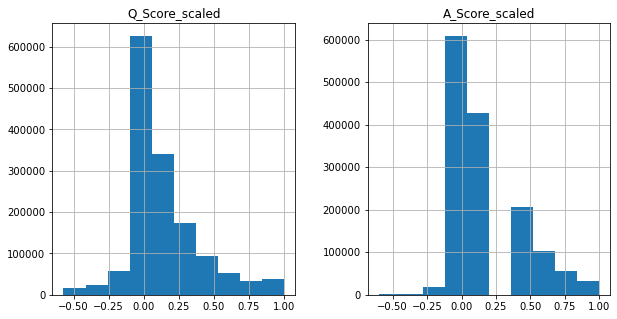

In [16]:
# Create a histogram for the 2 
plt.rcParams["figure.figsize"] = (10,5)

df_numeric.hist(['Q_Score_scaled','A_Score_scaled'])
plt.show()

In [17]:
# Drop non scaled column
#df_numeric.drop(columns=['Q_Score','A_Score'], inplace=True)
#df_numeric.head(5)

In [18]:
df_numeric[['Q_Score_scaled','A_Score_scaled']].describe()

,Q_Score_scaled,A_Score_scaled
count,1.455901e+06,1.455901e+06
mean,1.404869e-01,2.077217e-01
std,2.391823e-01,2.546290e-01
min,-5.714286e-01,-6.000000e-01
25%,0.000000e+00,0.000000e+00
50%,1.428571e-01,2.000000e-01
75%,2.857143e-01,4.000000e-01
max,1.000000e+00,1.000000e+00


In [19]:
df_numeric_scaled = pd.concat([df_categorical, df_numeric], axis=1, sort=False)
df_numeric_scaled.head(5)

,Title,Q_Body,Tag,A_Body,Unnamed: 0,Q_Score,A_Score,Id,Q_Score_scaled,A_Score_scaled
0,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",valid captur separ getter setter valid method ...,0,7,1,2750,1.0,0.2
1,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",perspect maintain code think much valid setter...,1,7,3,2750,1.0,0.6
2,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",depend gener code fail fast valu set multipl p...,2,7,3,2750,1.0,0.6
3,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",might wanna check domain driven design eric ev...,3,7,1,2750,1.0,0.2
4,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",like implement idataerrorinfo put valid logic ...,4,7,1,2750,1.0,0.2


In [20]:
df_numeric_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455901 entries, 0 to 1455900
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Title           1455901 non-null  object 
 1   Q_Body          1455901 non-null  object 
 2   Tag             1455898 non-null  object 
 3   A_Body          1455901 non-null  object 
 4   Unnamed: 0      1455901 non-null  int64  
 5   Q_Score         1455901 non-null  int64  
 6   A_Score         1455901 non-null  int64  
 7   Id              1455901 non-null  int64  
 8   Q_Score_scaled  1455901 non-null  float64
 9   A_Score_scaled  1455901 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 111.1+ MB


In [21]:
df_question_tag = df_numeric_scaled.drop(columns=['Title', 'A_Body', 'Unnamed: 0', 'Id', 'Q_Score_scaled','A_Score_scaled','Q_Score','A_Score'])
df_answer_score = df_numeric_scaled.drop(columns=['Title','Q_Body','Tag','Unnamed: 0','Id','Q_Score_scaled', 'A_Score','Q_Score'])
print(df_question_tag.head(2), df_answer_score.head(2))

                                              Q_Body  \
0  pim wonder good idea make stronggettersstrong ...   
1  pim wonder good idea make stronggettersstrong ...   

                                          Tag  
0  optimization, setter, getter, verification  
1  optimization, setter, getter, verification                                                 A_Body  A_Score_scaled
0  valid captur separ getter setter valid method ...             0.2
1  perspect maintain code think much valid setter...             0.6


### 2. Perform TFIDF on categorical features to fit and transform data

In [22]:
#a = np.zeros((200, 1455901), dtype='uint8')
#mb= a.nbytes/8000
#print('Megabytes needed to be allocated are',mb)

- We also want a measure of how unique a word is i.e. how infrequently the word occurs across all documents (inverse document frequency or idf). So, the product of tf & idf (TF-IDF) of a word gives a product of how frequent this word is in the document multiplied by how unique the word is w.r.t. the entire corpus of documents.
- Words in the document with a high tfidf score occur frequently in the document and provide the most information about that specific document.

**TFIDF on** 
- Question body and Tags
- Answer body and Scores

Furthermore, create dataframes with the vectorized values before performing modeling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer = TfidfVectorizer(max_features=200, ngram_range=(1, 1), stop_words = 'english')

In [24]:
tv_transformed_question= vectorizer.fit_transform(df_question_tag['Q_Body'])

# Create a DataFrame with these features
tv_df_question = pd.DataFrame(tv_transformed_question.toarray(), 
                     columns=vectorizer.get_feature_names())

print(tv_df_question.head(5))

    10  abl  access  activ   ad  add  amp  anoth  anyon  app  ...  version  \
0  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...      0.0   
1  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...      0.0   
2  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...      0.0   
3  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...      0.0   
4  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...      0.0   

   view  void  want  way  web  width  window  work  write  
0   0.0   0.0   0.0  0.0  0.0    0.0     0.0   0.0    0.0  
1   0.0   0.0   0.0  0.0  0.0    0.0     0.0   0.0    0.0  
2   0.0   0.0   0.0  0.0  0.0    0.0     0.0   0.0    0.0  
3   0.0   0.0   0.0  0.0  0.0    0.0     0.0   0.0    0.0  
4   0.0   0.0   0.0  0.0  0.0    0.0     0.0   0.0    0.0  

[5 rows x 200 columns]


In [25]:
sample_row = tv_df_question.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head(5))

make       0.503706
code       0.384240
idea       0.324484
databas    0.321080
think      0.320592
Name: 0, dtype: float64


In [26]:
print(tv_df_question.shape[0], df_numeric_scaled.shape[0])

1455901 1455901


In [27]:
tv_transformed_answer= vectorizer.fit_transform(df_answer_score['A_Body'])

# Create a DataFrame with these features
tv_df_answer = pd.DataFrame(tv_transformed_answer.toarray(), 
                     columns=vectorizer.get_feature_names())

print(tv_df_answer.head(5))

    10  access  actual   ad  add  allow   alreadi  amp  anoth  answer  ...  \
0  0.0     0.0     0.0  0.0  0.0    0.0  0.221444  0.0    0.0     0.0  ...   
1  0.0     0.0     0.0  0.0  0.0    0.0  0.000000  0.0    0.0     0.0  ...   
2  0.0     0.0     0.0  0.0  0.0    0.0  0.000000  0.0    0.0     0.0  ...   
3  0.0     0.0     0.0  0.0  0.0    0.0  0.000000  0.0    0.0     0.0  ...   
4  0.0     0.0     0.0  0.0  0.0    0.0  0.000000  0.0    0.0     0.0  ...   

   var  variabl  version  view  void    want       way    window  work  write  
0  0.0      0.0      0.0   0.0   0.0  0.0000  0.315390  0.000000   0.0    0.0  
1  0.0      0.0      0.0   0.0   0.0  0.0000  0.189883  0.000000   0.0    0.0  
2  0.0      0.0      0.0   0.0   0.0  0.0000  0.000000  0.000000   0.0    0.0  
3  0.0      0.0      0.0   0.0   0.0  0.0000  0.000000  0.000000   0.0    0.0  
4  0.0      0.0      0.0   0.0   0.0  0.1412  0.154366  0.224284   0.0    0.0  

[5 rows x 200 columns]


In [28]:
df_question_tfidf = pd.concat([df_numeric_scaled, tv_df_question], axis = 1, sort = False)
df_final_question = df_question_tfidf.drop(columns=['Q_Body','Title', 'A_Body', 'Unnamed: 0', 'Id', 'Q_Score_scaled','A_Score_scaled','Q_Score','A_Score'])

In [29]:
df_final_question.head(2)

,Tag,10,abl,access,activ,ad,add,amp,anoth,anyon,...,version,view,void,want,way,web,width,window,work,write
0,"optimization, setter, getter, verification",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"optimization, setter, getter, verification",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_answer_tfidf = pd.concat([df_numeric_scaled, tv_df_answer], axis = 1, sort=False)
df_final_answer = df_answer_tfidf.drop(columns=['Title','Q_Body','A_Body','Tag','Unnamed: 0','Id','Q_Score_scaled','Q_Score','A_Score'])

In [31]:
df_final_answer.head(2)

,A_Score_scaled,10,access,actual,ad,add,allow,alreadi,amp,anoth,...,var,variabl,version,view,void,want,way,window,work,write
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.221444,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.315390,0.0,0.0,0.0
1,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.189883,0.0,0.0,0.0


### 3. Training data development and Feature Selection

In [32]:
from sklearn.model_selection import train_test_split

train_question_df, test_question_df = train_test_split(df_final_question, test_size=0.3)
train_answer_df, test_answer_df = train_test_split(df_final_answer, test_size=0.3)

In [33]:
X_Question = train_question_df.loc[:, ~train_question_df.columns.isin(['Tag'])]
y_Question = train_question_df['Tag']
print(X_Question.head(2), y_Question.head(2))

          10  abl  access  activ   ad  add  amp  anoth  anyon       app  ...  \
1089787  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.148589  ...   
1024791  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.000000  ...   

         version  view  void  want       way  web  width  window     work  \
1089787      0.0   0.0   0.0   0.0  0.000000  0.0    0.0     0.0  0.09575   
1024791      0.0   0.0   0.0   0.0  0.119837  0.0    0.0     0.0  0.00000   

         write  
1089787    0.0  
1024791    0.0  

[2 rows x 200 columns] 1089787     javascript, asp.net-mvc
1024791    unit-testing, tfs, build
Name: Tag, dtype: object


In [34]:
X_Answer = train_answer_df.loc[:, ~train_answer_df.columns.isin(['A_Score_scaled'])]
y_Answer = train_answer_df['A_Score_scaled']
print(X_Answer.head(2), y_Answer.head(2))

          10  access  actual   ad      add  allow  alreadi  amp  anoth  \
1006988  0.0     0.0     0.0  0.0  0.44944    0.0      0.0  0.0    0.0   
470760   0.0     0.0     0.0  0.0  0.00000    0.0      0.0  0.0    0.0   

         answer  ...  var  variabl  version  view  void  want       way  \
1006988     0.0  ...  0.0      0.0  0.00000   0.0   0.0   0.0  0.422805   
470760      0.0  ...  0.0      0.0  0.22447   0.0   0.0   0.0  0.000000   

         window  work  write  
1006988     0.0   0.0    0.0  
470760      0.0   0.0    0.0  

[2 rows x 200 columns] 1006988    0.2
470760     0.4
Name: A_Score_scaled, dtype: float64


In [35]:
#df_final_ques_tfidf.to_csv("../data/Question_Tags_tfidf.csv")

In [36]:
#df_final_answer_tfidf.to_csv("../data/Answers_Votes_tfidf.csv")

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

topics = 20
lda = LatentDirichletAllocation(n_components=topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(tv_transformed_question)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")
        

no_top_words = 10
display_topics(lda, vectorizer_train.get_feature_names(), no_top_words)

## Modeling

Perform multi label classification modeling on the ```df_question_tag``` dataframe that has Q_Body and Tag columns in order to determine what tag will be classified for a given question based on the body of question posted on Stackoverflow

### Multi-Label Classification Techniques
Most traditional learning algorithms are developed for single-label classification problems. Therefore a lot of approaches in the literature transform the multi-label problem into multiple single-label problems, so that the existing single-label algorithms can be used.

- To solve multi-label classification problem, we can decompose it into multiple independent binary classification problems (one per category) using “one-to-rest” strategy, where we will build multiple independent classifiers and, for an unseen instance, choose the class for which the confidence is maximized.
- The main assumption here is that the labels are mutually exclusive. You do not consider any underlying correlation between the classes in this method.

In [37]:
df_Tag = df_final_question['Tag']
df_Tag.head(2)

0    optimization, setter, getter, verification
1    optimization, setter, getter, verification
Name: Tag, dtype: object

<AxesSubplot:>

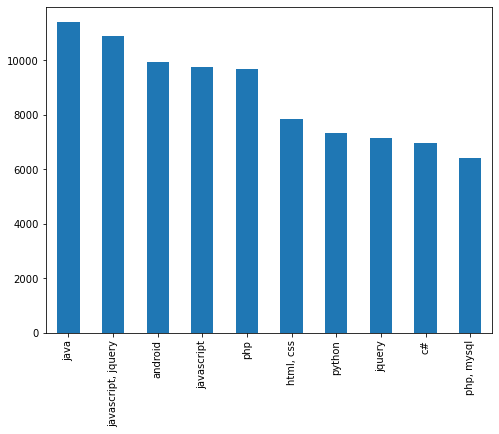

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))

df_Tag.value_counts().head(10).plot.bar(ylim=0)

In [ ]:
#Import ML models:
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree,metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, precision_recall_fscore_support as score
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
def avg_jacard(y_true,y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y,y_pred).sum(axis=1)
    
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")    

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
    
start_train = time.time()
# Training logistic regression model on train data
LogReg_pipeline.fit(X_Question)
    
end_train = time.time()
training_time_lr = (end_train - start_train)

start_predict = time.time()
y_pred_lr = Logreg.predict(X_Question)
end_predict = time.time()
predict_time_lr = (end_predict - start_predict)

# Print the training and prediction time
print('Training time is:', training_time_lr)
print('Prediction time is:', predict_time_lr)

# Print the model performance from the testing data.
print('====Naive Logistic Regression====')
print('Accuracy score:', round(accuracy_score(y_Question, Logreg.predict(X_Question)),3))
print('Precision score:', round(precision_score(y_Question, Logreg.predict(X_Question)),3))
print('Recall score:', round(recall_score(y_Question, Logreg.predict(X_Question)),3))
print('F1 score:', round(f1_score(y_Question, Logreg.predict(X_Question),average='weighted'),3))
print('ROC AUC score:', round(roc_auc_score(y_Question,Logreg.predict(X_Question)),3))

ValueError: Expected array-like (array or non-string sequence), got None